# Ensemble Learning
### 3 tipos de EL:
1. Ensemble / Bagging Model ==> Aggregating
2. Stacking Model
    - aprendices nivel 0 == combinacion de modelos 
    - Modelo de nivel 1 == Meta-learner ==> votación, la predicción más común
3. Boosting Model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
X_over_under_sample = pd.read_csv('datasets/X_oversample.csv')
y_over_under_sample = pd.read_csv('datasets/y_oversample.csv')
X_test = pd.read_csv('datasets/TestEncoded.csv')
X_train, y_train = X_over_under_sample, y_over_under_sample

In [3]:
from sklearn.ensemble import StackingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

def get_models():
    models = dict() #list() # append
    models.update({'KNeighborsClassifier': KNeighborsClassifier()})
    models.update({'LogisticRegression': LogisticRegression()})
#     models.update({'RidgeClassifier': RidgeClassifier()})
#     models.update({'SGDClassifier': SGDClassifier()})
#     models.update({'PassiveAggressiveClassifier': PassiveAggressiveClassifier()})
#     models.update({'DecisionTreeClassifier': DecisionTreeClassifier()})
#     models.update({'ExtraTreeClassifier': ExtraTreeClassifier()})
#     models.update({'LinearSVC': LinearSVC()})
#     models.update({'SVC': SVC()})
#     models.update({'GaussianNB': GaussianNB()})
    models.update({'AdaBoostClassifier': AdaBoostClassifier()})
    models.update({'BaggingClassifier': BaggingClassifier()})
#     models.update({'RandomForestClassifier': RandomForestClassifier()})
#     models.update({'ExtraTreesClassifier': ExtraTreesClassifier()})
#     models.update({'GaussianProcessClassifier': GaussianProcessClassifier()})
#     models.update({'GradientBoostingClassifier': GradientBoostingClassifier()})
    models.update({'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis()})
#     models.update({'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis()})
    models.update({'LGBMClassifier': LGBMClassifier()})
#     models.update({'CatBoostClassifier': CatBoostClassifier()})
#     models.update({'XGBClassifier': XGBClassifier()})
    return models
models = get_models()

In [4]:
def get_stacking(): 
    level0 = list()
    level0.append(('knn', KNeighborsClassifier))## crear el stacking de los modelos
def get_stacking():
    ## definir los modelos base
    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    #level0.append(('dt', DecisionTreeClassifier()))
    level0.append(('bgc', BaggingClassifier()))
    level0.append(('ab', AdaBoostClassifier()))
#     level0.append(('rf', RandomForestClassifier()))
#     level0.append(('gp', GaussianProcessClassifier()))
    level0.append(('ld', LinearDiscriminantAnalysis()))
    level0.append(('lgb', LGBMClassifier()))
#     level0.append(('cbc', CatBoostClassifier()))
#     level0.append(('xgb', XGBClassifier()))
#     level0.append(('gst', StackingClassifier()))
    ## definir el metalearner
    level1 = LogisticRegression()
    
    ## definir el stacking - ensemble 
    model = StackingClassifier(estimators= level0, final_estimator=level1, cv = 5)
    return model

In [5]:
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold

def evaluate_model(model, X, y):
    cv = KFold(n_splits=5)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores

In [6]:
results,names = [ ], [ ]

KNeighborsClassifier, 0.5478071849796089, 0.276311535746753
LogisticRegression, 0.5207275345828881, 0.28496089825987464
AdaBoostClassifier, 0.6005889675207521, 0.3008058506190973
BaggingClassifier, 0.6110878417265795, 0.3057332009410245
LinearDiscriminantAnalysis, 0.6728810971212711, 0.33651856566911414
LGBMClassifier, 0.6599226418671182, 0.33005261265455066


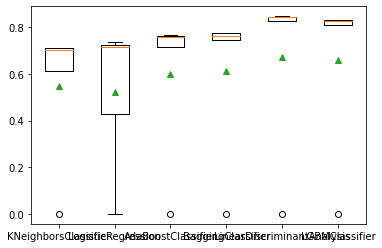

In [7]:
for name, model in models.items():
    scores = evaluate_model(model, X_over_under_sample, y_over_under_sample)
    results.append(scores)
    names.append(name)
    print(f'{name}, {np.mean(scores)}, {np.std(scores)}')
plt.boxplot(results, labels = names, showmeans= True)
plt.show()

In [8]:
def get_models():
    models = dict() #list() # append
    models.update({'KNeighborsClassifier': KNeighborsClassifier()})
    models.update({'LogisticRegression': LogisticRegression()})
#     models.update({'RidgeClassifier': RidgeClassifier()})
#     models.update({'SGDClassifier': SGDClassifier()})
#     models.update({'PassiveAggressiveClassifier': PassiveAggressiveClassifier()})
    #models.update({'DecisionTreeClassifier': DecisionTreeClassifier()})
#     models.update({'ExtraTreeClassifier': ExtraTreeClassifier()})
#     models.update({'LinearSVC': LinearSVC()})
#     models.update({'SVC': SVC()})
#     models.update({'GaussianNB': GaussianNB()})
    models.update({'AdaBoostClassifier': AdaBoostClassifier()})
    models.update({'BaggingClassifier': BaggingClassifier()})
#     models.update({'RandomForestClassifier': RandomForestClassifier()})
#     models.update({'ExtraTreesClassifier': ExtraTreesClassifier()})
#     models.update({'GaussianProcessClassifier': GaussianProcessClassifier()})
#     models.update({'GradientBoostingClassifier': GradientBoostingClassifier()})
    models.update({'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis()})
#     models.update({'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis()})
    models.update({'LGBMClassifier': LGBMClassifier()})
#     models.update({'CatBoostClassifier': CatBoostClassifier()})
    #models.update({'XGBClassifier': XGBClassifier()})
    models.update({'StackingClassifier': get_stacking()})
    return models
models = get_models()

def get_stacking():
    ## definir los modelos base
    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    #level0.append(('dt', DecisionTreeClassifier()))
    level0.append(('bgc', BaggingClassifier()))
    level0.append(('ab', AdaBoostClassifier()))
#     level0.append(('rf', RandomForestClassifier()))
#     level0.append(('gp', GaussianProcessClassifier()))
    level0.append(('ld', LinearDiscriminantAnalysis()))
    level0.append(('lgb', LGBMClassifier()))
#     level0.append(('cbc', CatBoostClassifier()))
#     level0.append(('xgb', XGBClassifier()))
#     level0.append(('gst', StackingClassifier()))
    ## definir el metalearner
    level1 = LogisticRegression()
    
    ## definir el stacking - ensemble 
    model = StackingClassifier(estimators= level0, final_estimator=level1, cv = 5)
    return model

In [9]:
models = get_models()

KNeighborsClassifier, 0.5478071849796089, 0.276311535746753
LogisticRegression, 0.5207275345828881, 0.28496089825987464
AdaBoostClassifier, 0.6005889675207521, 0.3008058506190973
BaggingClassifier, 0.6078516042555966, 0.3040790781020689
LinearDiscriminantAnalysis, 0.6728810971212711, 0.33651856566911414
LGBMClassifier, 0.6599226418671182, 0.33005261265455066
StackingClassifier, 0.6797550567610903, 0.34007973043527007


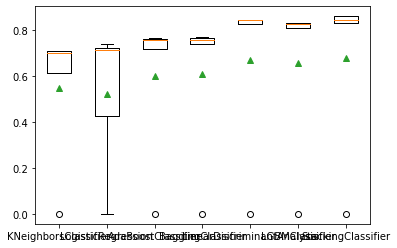

In [10]:
results,names = [ ], [ ]
for name, model in models.items():
    scores = evaluate_model(model, X_over_under_sample, y_over_under_sample)
    results.append(scores)
    names.append(name)
    print(f'{name}, {np.mean(scores)}, {np.std(scores)}')

    
plt.boxplot(results, labels = names, showmeans= True)
plt.show()

In [11]:
model = get_stacking()

In [12]:
model.fit(X_over_under_sample, y_over_under_sample)

C:\Users\porta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression()),
                               ('bgc', BaggingClassifier()),
                               ('ab', AdaBoostClassifier()),
                               ('ld', LinearDiscriminantAnalysis()),
                               ('lgb', LGBMClassifier())],
                   final_estimator=LogisticRegression())

In [13]:
y_pred = model.predict(X_test)

In [14]:
def results_to_csv(file_name, y_pred):
    model = pd.DataFrame({'id':list(range(1,len(y_pred)+1)),
                        'rating': y_pred})
    model.to_csv(f'results/{file_name}.csv', index = False)
    return model

In [15]:
results_to_csv(f'StackingClassifier - {2}', y_pred)

,id,rating
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
1443,1444,1.0
1444,1445,1.0
1445,1446,1.0
1446,1447,1.0
